In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.callbacks import EarlyStopping
metric = {}
import random
from keras.callbacks import TensorBoard

In [2]:
def get_imageset(imagedir):

    temp=[]
    for image  in os.listdir(imagedir):
        im= Image.open(imagedir+image)
        im=im.convert('L')
        temp.append(np.array(im))
    
    images=np.array(temp)
    images=np.where(images<np.mean(images),0,1).astype('float64')
    return images
    
    #converts the given images into numpy arrays that can be feeded into the perceptron
    # images = sorted([img_name for img_name in os.listdir(datadir) if img_name!=".DS_Store"])
    # print(images)
    # matrix = np.array([np.array(Image.open(datadir+each_img).convert('L')) for each_img in images])
    # matrix = np.where(matrix<np.mean(matrix),0,1).astype('float64')
    # return matrix

In [3]:
os.listdir()

['amer_sign2.png',
 'data',
 'Dataset 1',
 'Dataset 2',
 'Dataset 2 - Copy',
 'Dataset 3',
 'graphs',
 'new',
 'NN Assignment 2 - Dataset 3.ipynb',
 'NN Assignment 2.ipynb',
 'Noise',
 'test.ipynb',
 'Trained_MLNN_auto.h5']

In [4]:
X_train = get_imageset("C:/Users/venky/OneDrive/Desktop/NN/Assignment 2/Dataset 1/")
X_test = get_imageset("C:/Users/venky/OneDrive/Desktop/NN/Assignment 2/Dataset 1/")
X_val = get_imageset("C:/Users/venky/OneDrive/Desktop/NN/Assignment 2/Dataset 1/")

print(X_train.shape,X_test.shape,X_val.shape,X_test.dtype,X_train.dtype,X_val.dtype)

(36, 16, 16) (36, 16, 16) (36, 16, 16) float64 float64 float64


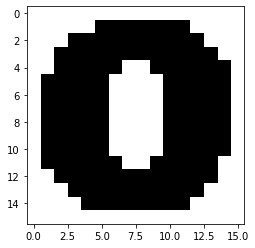

In [5]:
#Flattening the input data
X_train= X_train.reshape(X_train.shape[0],1,256)
X_test = X_test.reshape(X_test.shape[0],1,256)
X_val = X_val.reshape(X_val.shape[0],1,256)
plt.imshow(X_train[0].reshape(16,16),cmap="gray")

In [11]:
# Fully connected input layer with 256*256 weights
# Number of bias: 256
# Number of Output Nodes: 256

model = Sequential()
model.add(Dense(256,activation='sigmoid',input_shape=(1,256)))
model.add(Dropout(0.5))
model.add(Dense(64,activation='sigmoid'))
model.add(Dense(64,activation='sigmoid'))
model.add(Dense(256,activation='sigmoid'))
model.compile(loss='mean_squared_error',optimizer='adam')
# Diplay the model summary
print("model summary")
tensor_board = TensorBoard(log_dir='./graphs', histogram_freq=0, write_graph=True, write_images=True)
model.summary()
print("Shapes of weights and bias arrays")
for x in range(0,1):
    print(model.get_layer(index=x).get_weights()[0].shape)
    print(model.get_layer(index=x).get_weights()[1].shape)
stop = EarlyStopping(monitor='loss', mode='min',patience=10,min_delta=0.0001) 

model summary
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1, 256)            65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 256)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 1, 64)             16448     
_________________________________________________________________
dense_6 (Dense)              (None, 1, 64)             4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1, 256)            16640     
Total params: 103,040
Trainable params: 103,040
Non-trainable params: 0
_________________________________________________________________
Shapes of weights and bias arrays
(256, 256)
(256,)


In [12]:
#Training the model
results = model.fit(X_train,X_train, 
                    validation_data=(X_val,X_val), 
                    epochs=1000,batch_size=4,callbacks=[stop,tensor_board])

Epoch 1/1000
9/9 [==============================] - 2s 101ms/step - loss: 0.2373 - val_loss: 0.2213
Epoch 2/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.2120 - val_loss: 0.2000
Epoch 3/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.1931 - val_loss: 0.1845
Epoch 4/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.1803 - val_loss: 0.1755
Epoch 5/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.1741 - val_loss: 0.1712
Epoch 6/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.1709 - val_loss: 0.1694
Epoch 7/1000
9/9 [==============================] - 0s 7ms/step - loss: 0.1694 - val_loss: 0.1685
Epoch 8/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.1692 - val_loss: 0.1681
Epoch 9/1000
9/9 [==============================] - 0s 7ms/step - loss: 0.1682 - val_loss: 0.1677
Epoch 10/1000
9/9 [==============================] - 0s 7ms/step - loss: 0.1680 - val_loss: 0.1674
Epoch 11/1000
9/9

In [13]:
# Saving the model
model.save("Trained_MLNN_auto.h5")

In [14]:
def compare_results(xt,yp):
    """
    xt: Dataset Images
    yp: Predicted Images
    comparing image dataset against the predictions given by the output
    """
    for i in range(0,xt.shape[0]):
        f = plt.figure()
        x = 1
        f.add_subplot(x,2, 1)
        plt.imshow(xt[i].reshape(16,16),cmap="gray")
        plt.title('Original Dataset Image')
        f.add_subplot(x,2, 2)
        plt.imshow(yp[i].reshape(16,16),cmap="gray")
        plt.title('MLNN Predicted Image')

(36, 1, 256) (36, 1, 256)


C:\Users\venky\AppData\Local\Temp\ipykernel_1756\808487100.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure()


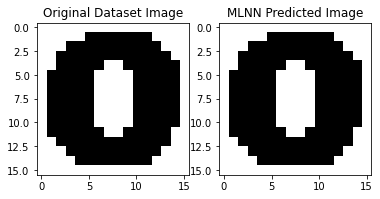

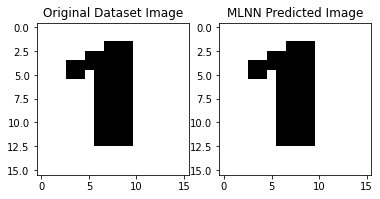

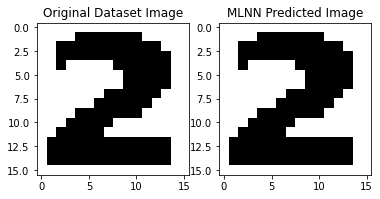

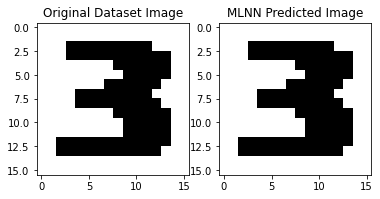

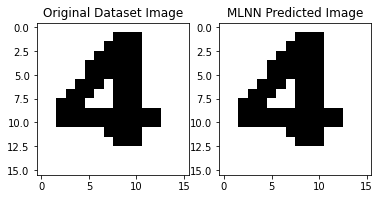

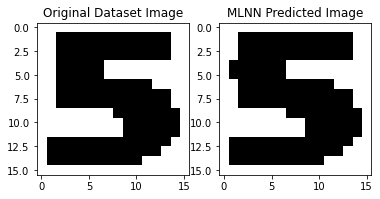

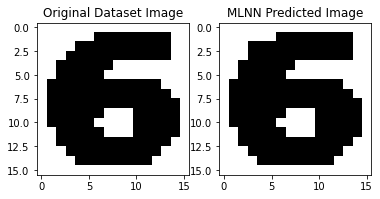

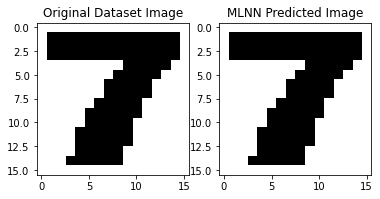

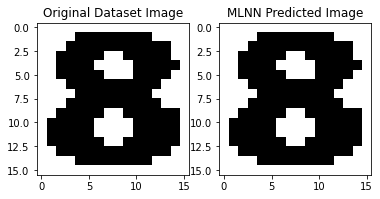

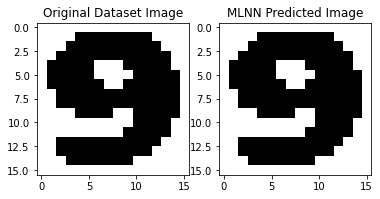

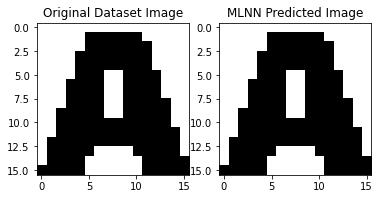

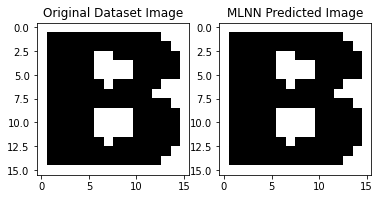

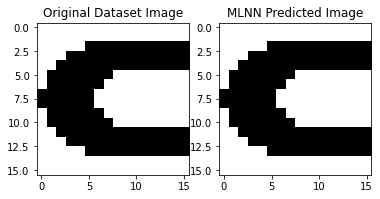

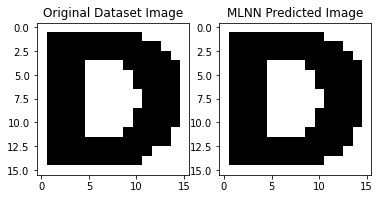

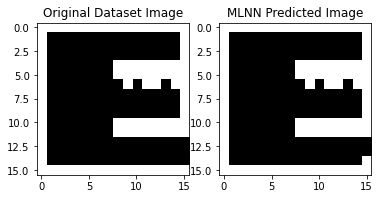

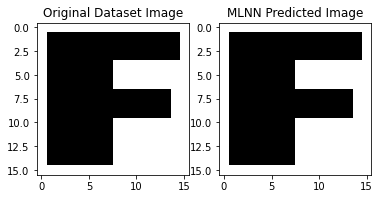

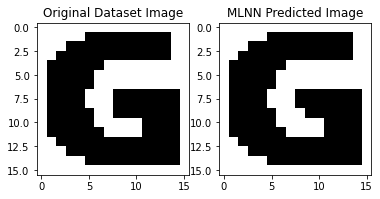

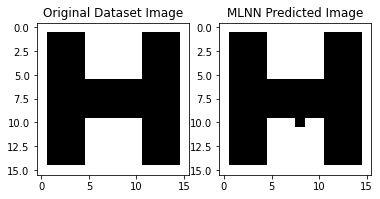

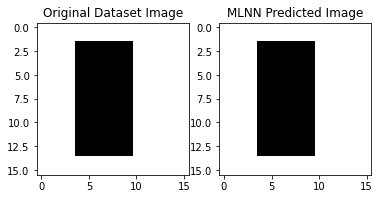

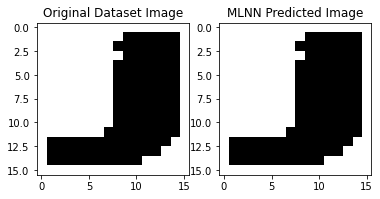

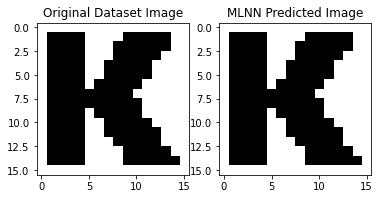

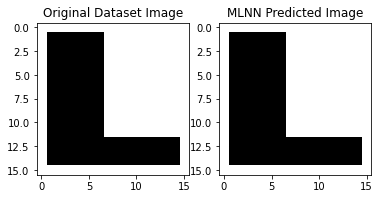

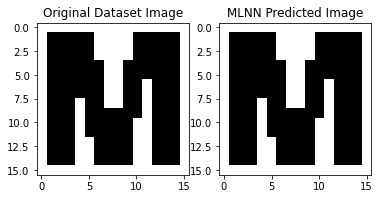

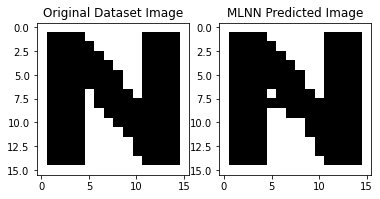

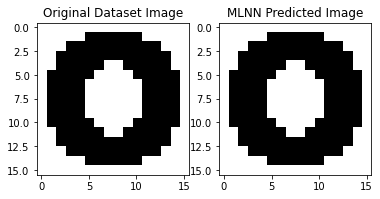

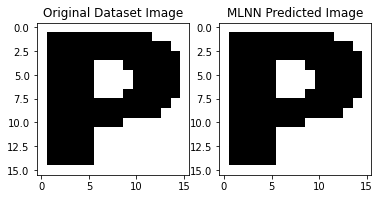

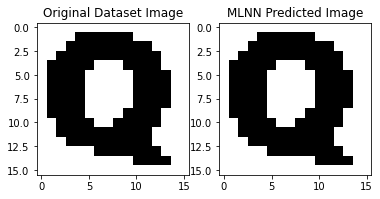

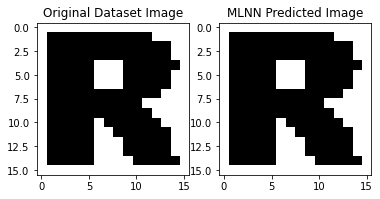

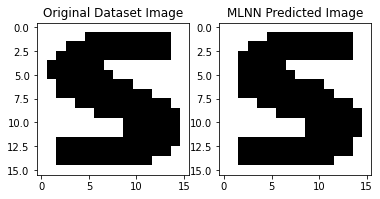

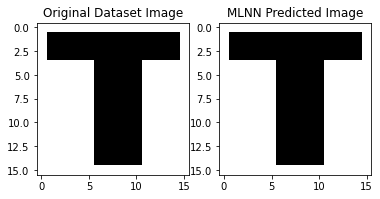

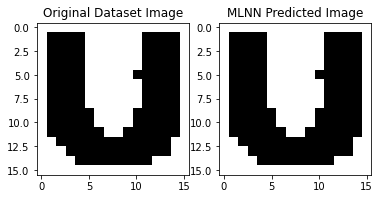

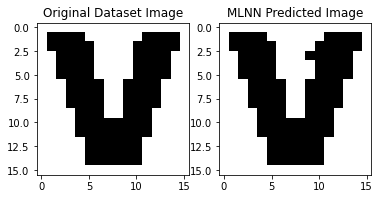

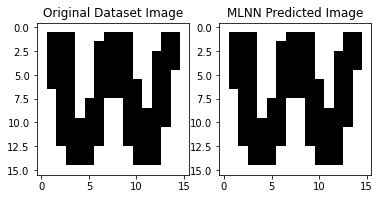

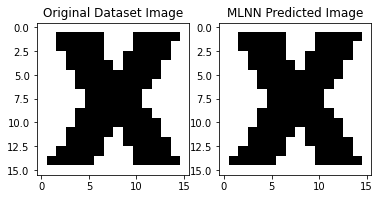

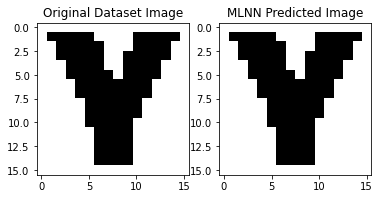

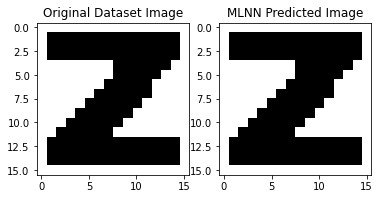

In [15]:
#predicting the output for given training data
y_pred = model.predict(X_train)
y_pred = np.where(y_pred<np.mean(y_pred),0,1).astype('float64')
X_train = np.where(X_train<np.mean(X_train),0,1).astype('float64')
print(X_train.shape,y_pred.shape)
compare_results(X_train,y_pred)

In [17]:
def add_gaussian_noise(seed_no,stddev,img):
    """
    Adding gaussian noise to 10% of the image pixels
    stddev: standard deviation
    img: image that needs to be corrupted with noise
    """
    random.seed(seed_no)
    rand_idx=[]
    for i in range(0,25):
        random_index1=np.random.choice(16)
        random_index2=np.random.choice(16)
        rand_idx.append([random_index1,random_index2])
        #print([random_index1,random_index2])
    #len(rand_idx)
    noise_pixels = np.ones([16,16],dtype="float64")
    gauss_noise = np.random.normal(0.0,stddev*0.5, [16,16])
    for i in rand_idx:
        noise_pixels[i[0]][i[1]] = gauss_noise[i[0]][i[1]]
    noisy_img = noise_pixels+img
    noisy_img = np.where(noisy_img<noisy_img.mean(),0,1).astype('float64')
    return noisy_img

In [18]:
def add_noise(stddev,datadir):
    img_set = get_imageset("C:/Users/venky/OneDrive/Desktop/NN/Assignment 2/Dataset 1/")
    #print(img_set.shape)
    for i in range(img_set.shape[0]):
        #print(i)
        gaussy_img = add_gaussian_noise(16,stddev,img_set[i])
        plt.imsave(datadir+str(i)+'.jpg', gaussy_img,cmap='gray')
        #print("saved")
        #plt.imshow(ll,cmap="gray")

In [19]:
stddev_dir={0:'C:/Users/venky/OneDrive/Desktop/NN/Assignment 2/Dataset 1/',0.1:'C:/Users/venky/OneDrive/Desktop/NN/Assignment 2/Noise/dev1/',0.01:'C:/Users/venky/OneDrive/Desktop/NN/Assignment 2/Noise/dev01/',0.02:'C:/Users/venky/OneDrive/Desktop/NN/Assignment 2/Noise/dev02/',0.03:'C:/Users/venky/OneDrive/Desktop/NN/Assignment 2/Noise/dev03/',0.05:'C:/Users/venky/OneDrive/Desktop/NN/Assignment 2/Noise/dev05/',
           0.001:'C:/Users/venky/OneDrive/Desktop/NN/Assignment 2/Noise/dev001/',0.002:'C:/Users/venky/OneDrive/Desktop/NN/Assignment 2/Noise/dev002/',0.003:'C:/Users/venky/OneDrive/Desktop/NN/Assignment 2/Noise/dev003/',0.005:'C:/Users/venky/OneDrive/Desktop/NN/Assignment 2/Noise/dev005/'}

In [20]:
def metric_calculation(test,pred):
    """
    test: original image
    pred: predicted image
    n_inp_zeros: no. of white pixels in the original image
    n_inp_ones: no. of black pixels in the predicted image
    n_out_zeros: no. of white pixels in the original image
    n_out_ones: no. of black pixels in the predicted image
    
    ff = no. of black pixels that OCCUR in the correct position 
         corresponding to its original noiseless image/
         total no. of BLACK pixels in input image
    fha = no. of black pixels that DONOT OCCUR in the correct position 
         corresponding to its original noiseless image/
         total no. of WHITE pixels in input image
    """
    ff = []
    fha = []
    #print(pred[0])
    for i in range(test.shape[0]):
        n_inp_zeros = (test[i]==0).sum()
        n_inp_ones = (test[i]==1).sum()
        n_out_zeros = (pred[i]==0).sum()
        n_out_ones = (pred[i]==1).sum()
        ## and operation i performed to find no of black pixels that occur coorectly
        #and_op = np.logical_and(test[i],pred[i]).astype('float64')
        right_ones = (np.logical_and(test[i],pred[i]).astype('float64')==1).sum()
        #print(right_ones,n_inp_ones)
        ff.append(round(right_ones/n_inp_ones,2))
        #print("shs",ff)
        fha.append(abs(round((n_out_ones-right_ones)/n_inp_zeros,2)))
        #print(n_inp_zeros,n_inp_ones,n_out_zeros,n_out_ones)
    return ff,fha

In [21]:
for std in stddev_dir:
    if std>0:
        add_noise(std,stddev_dir[std])
    X_test = get_imageset(stddev_dir[std])
    X_test = X_test.reshape(X_test.shape[0],1,256)
    y_pred = model.predict(X_test)
    yp = np.where(y_pred<np.mean(y_pred),0,1).astype('float64')
    xt = np.where(X_test<np.mean(X_test),0,1).astype('float64')
    fh,ffa = metric_calculation(xt,yp)
    fh,ffa
    metric[std]=[fh,ffa]
print("DOne")

DOne


In [22]:
metric

{0: [[1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0.98,
   0.99,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0.99,
   1.0,
   1.0,
   1.0,
   0.99,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0.99,
   1.0,
   1.0,
   0.99,
   1.0,
   0.99,
   1.0,
   1.0,
   0.99,
   1.0,
   1.0,
   1.0,
   1.0],
  [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.01,
   0.0,
   0.01,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.01,
   0.0,
   0.0,
   0.0,
   0.0,
   0.02,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0]],
 0.1: [[1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0.99,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0.99,
   1.0,
   1.0,
   0.99,
   1.0,
   0.99,
   1.0,
   1.0,
   1.0,
   0.99,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0.97,
   0.99,
   1.0,
   1.0,
   1.0],
  [0.07,
   0.29,
   0.07,
   0.07,
   0.11,
   0.11,
   0.04,
   0.09,
   0.09,
   0.08,
   0.17,
   0.1

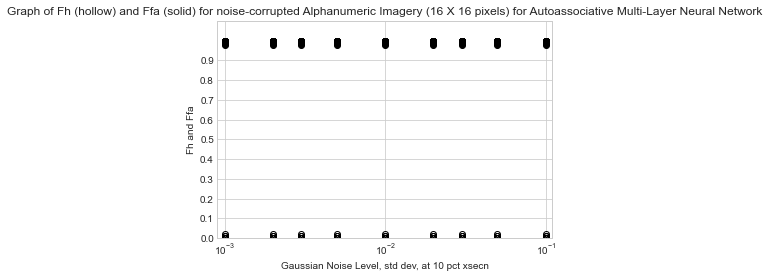

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab

plt.style.use('seaborn-whitegrid')
for i in range(0,33):
    for std in stddev_dir:
        plt.plot(std,metric[0][0][i],'o',color='black') 
        plt.plot(std,metric[0][1][i],'o',color='black',markerfacecolor='none') 
#--------------The x axis is logarithmically scaled as mentioned in the  requirements----------------    
plt.xscale('log')
plt.yticks(np.arange(0,1,0.1))
plt.xlim([0.0009,0.1101])
plt.ylim([0,1.1])
#--------------Naming of the graph------------------
plt.xlabel('Gaussian Noise Level, std dev, at 10 pct xsecn')
plt.ylabel('Fh and Ffa')
plt.title('Graph of Fh (hollow) and Ffa (solid) for noise-corrupted Alphanumeric Imagery (16 X 16 pixels) for Autoassociative Multi-Layer Neural Network')
plt.show()

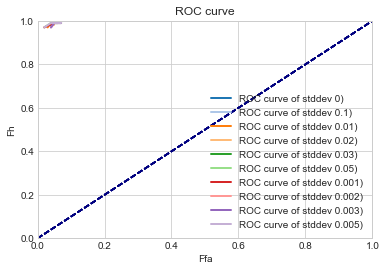

In [24]:
#ROC Curve
colors = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78',
          '#2ca02c','#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5']
for std, color in zip(stddev_dir, colors):
    fh= metric[std][0]
    ffa = metric[std][1]
    fh.sort()
    ffa.sort()
    plt.plot(ffa,fh, color=color, lw=2,
             label='ROC curve of stddev {0})'
             ''.format(std))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('Ffa')
    plt.ylabel('Fh')
    plt.title("ROC curve")
    plt.legend(loc="lower right")
   

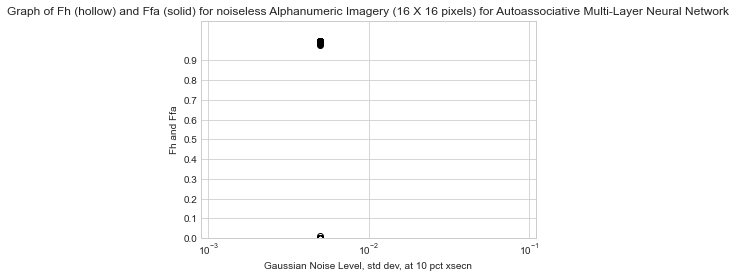

In [25]:
# graph for Fh anf Ffa for noiseless data
%matplotlib inline
import matplotlib.pyplot as plt
import pylab

plt.style.use('seaborn-whitegrid')
for i in range(0,33):
    plt.plot(std,metric[0][0][i],'o',color='black') 
    plt.plot(std,metric[0][1][i],'o',color='black',markerfacecolor='none') 
#--------------The x axis is logarithmically scaled as mentioned in the  requirements----------------    
plt.xscale('log')
plt.yticks(np.arange(0,1,0.1))
plt.xlim([0.0009,0.1101])
plt.ylim([0,1.1])
#--------------Naming of the graph------------------
plt.xlabel('Gaussian Noise Level, std dev, at 10 pct xsecn')
plt.ylabel('Fh and Ffa')
plt.title('Graph of Fh (hollow) and Ffa (solid) for noiseless Alphanumeric Imagery (16 X 16 pixels) for Autoassociative Multi-Layer Neural Network')
plt.show()

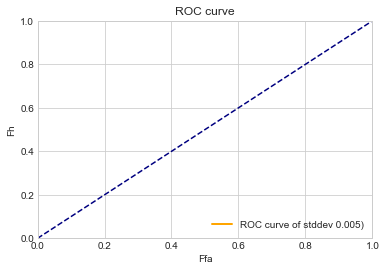

In [26]:
# ROC FOR NOISELESS DATA
fh= metric[0][0]
ffa = metric[0][1]
fh.sort()
ffa.sort()
plt.plot(ffa,fh, color='orange', lw=2,
             label='ROC curve of stddev {0})'
             ''.format(std))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Ffa')
plt.ylabel('Fh')
plt.title("ROC curve")
plt.legend(loc="lower right")